# Breast Cancer Detection



### Import ML packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

### Load and Read Dataset

In [ ]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
#Shape of the Dataset
print(df.shape)
df.head()

(699, 11)


,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['class'].value_counts()

,count
class,
2,458
4,241


## Data pre-processing & Handling missing values

It is very important to clean the data because it contains many unwanted columns, unwanted data, outliers, null values, nan columns and many more. Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model.

In [ ]:
df.drop(['id'],axis=1,inplace = True)

In [ ]:
df.isna().sum()

,0
clump_thickness,0
uniform_cell_size,0
uniform_cell_shape,0
marginal_adhesion,0
single_epithelial_size,0
bare_nuclei,0
bland_chromatin,0
normal_nucleoli,0
mitoses,0
class,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   clump_thickness         699 non-null    int64 
 1   uniform_cell_size       699 non-null    int64 
 2   uniform_cell_shape      699 non-null    int64 
 3   marginal_adhesion       699 non-null    int64 
 4   single_epithelial_size  699 non-null    int64 
 5   bare_nuclei             699 non-null    object
 6   bland_chromatin         699 non-null    int64 
 7   normal_nucleoli         699 non-null    int64 
 8   mitoses                 699 non-null    int64 
 9   class                   699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [ ]:
df.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
np.sum([df['bare_nuclei']=='?'])

16

In [ ]:
df.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)

In [ ]:
#699-16 = 683
print(df.shape)
df.head()

(683, 10)


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

## Exploratory Data Analysis

In [ ]:
#Diagnosis class Malignant = 4 and Benign = 2
#The number of Benign and Maglinant cases from the dataset
df['class'].value_counts()

,count
class,
2,444
4,239


In [ ]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Data Analysis

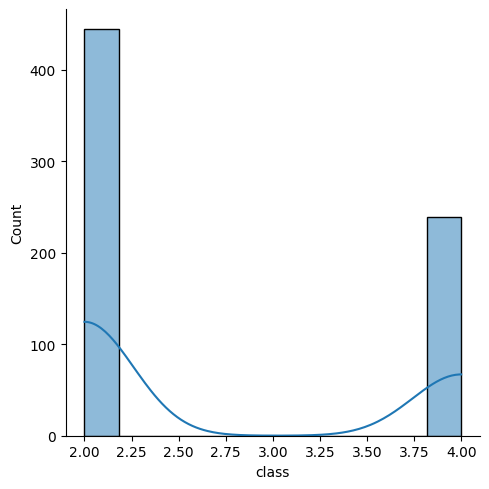

In [ ]:
sns.displot(df['class'],kde=True)

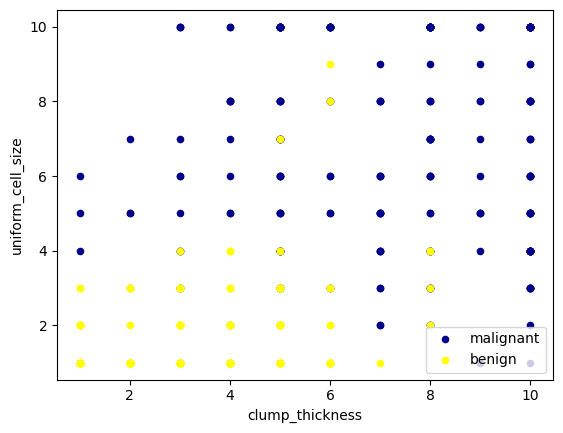

In [ ]:
ax = df[df['class'] == 4][:].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='DarkBlue', label='malignant');
df[df['class'] == 2][:].plot(kind='scatter', x='clump_thickness', y='uniform_cell_size', color='Yellow', label='benign', ax=ax);
plt.show()

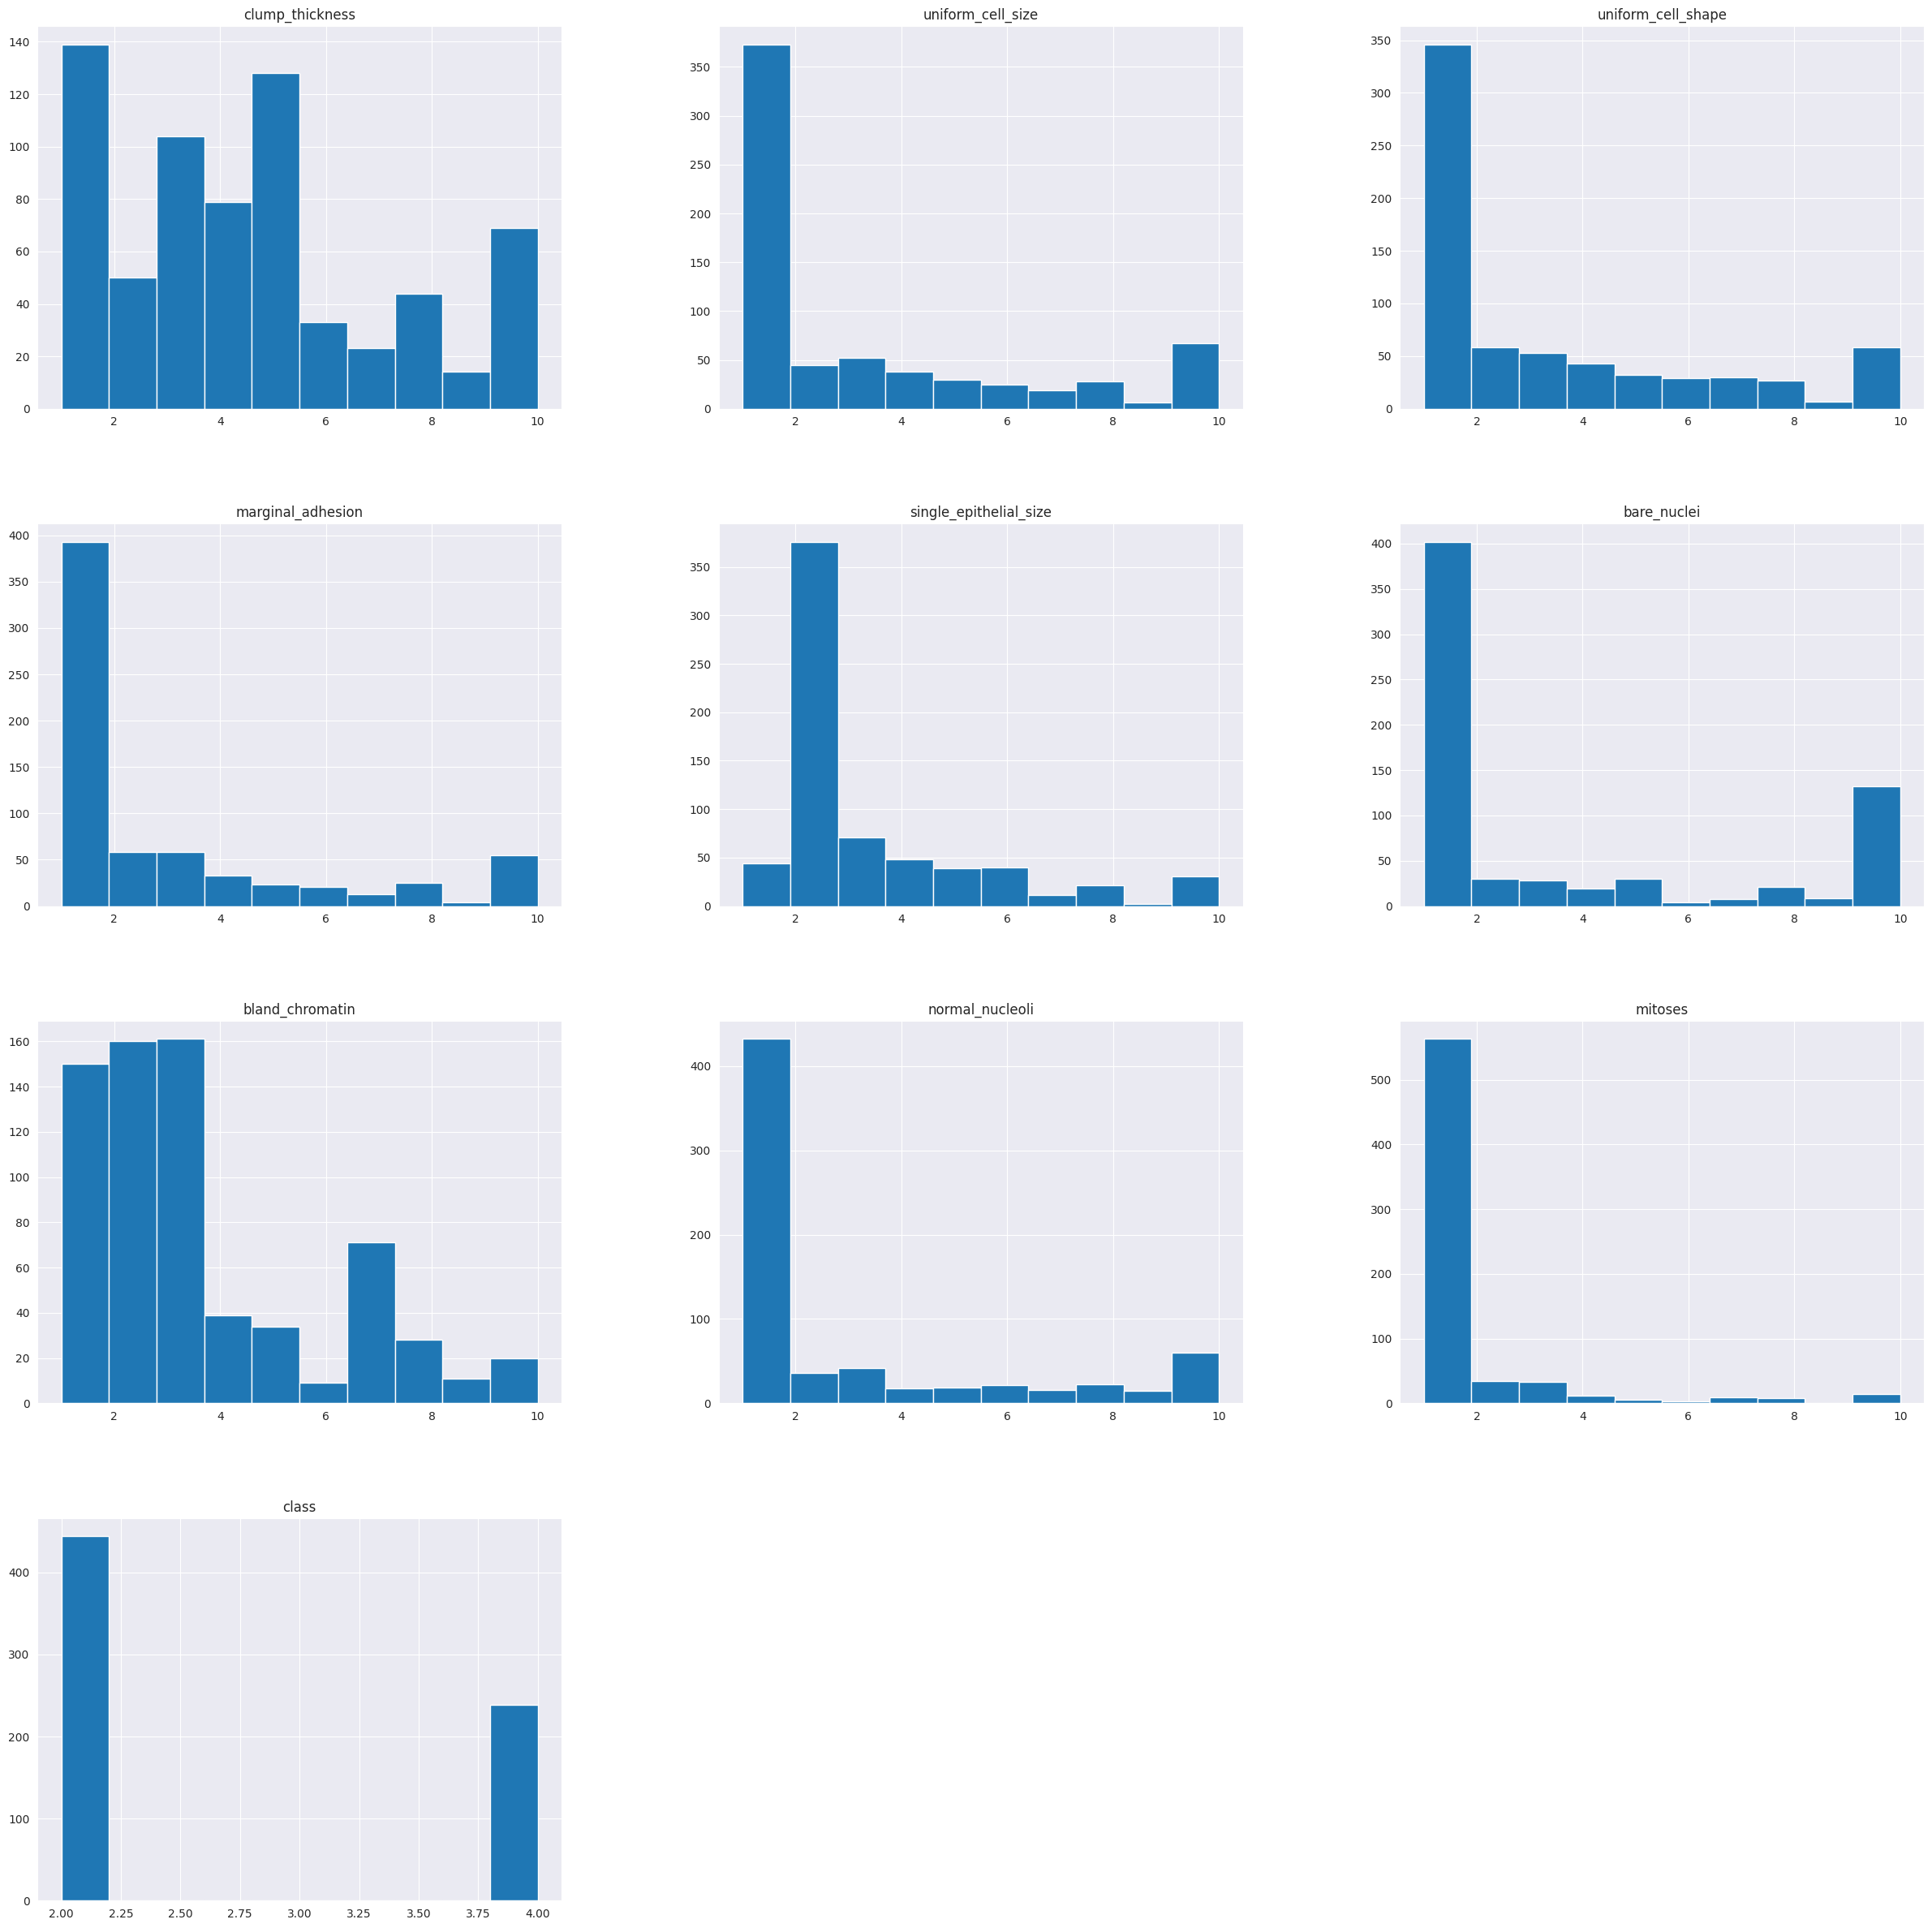

In [ ]:
# Plot histograms for each variable
sns.set_style('darkgrid')
df.hist(figsize=(30,30))
plt.show()

<Axes: >

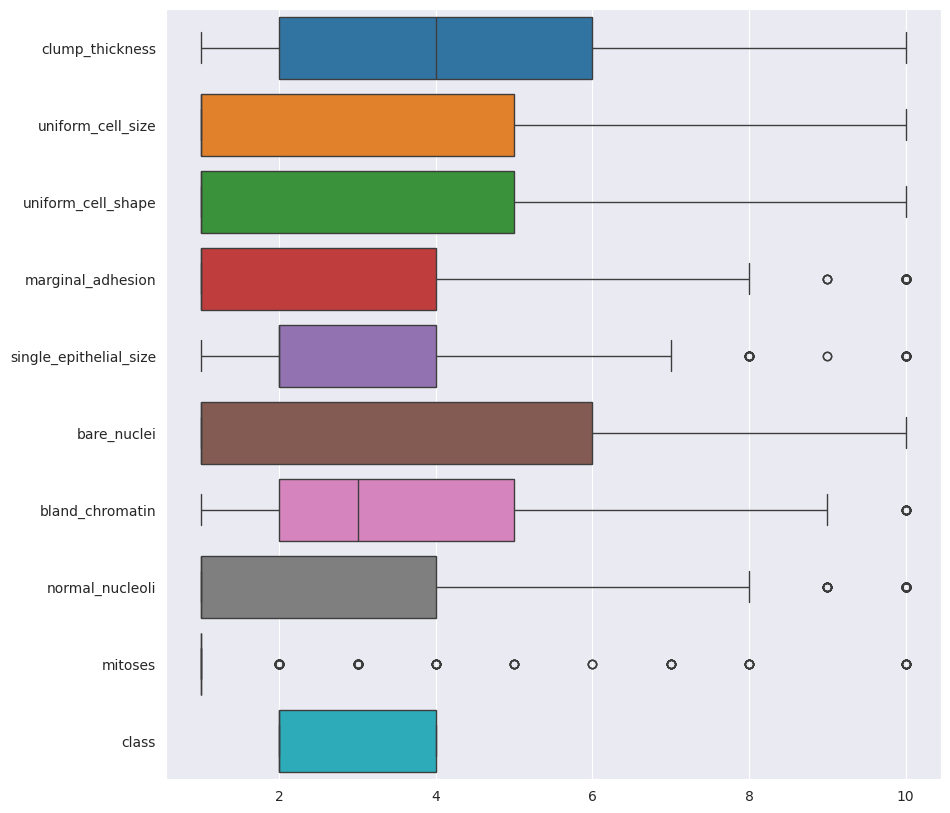

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')

## Feature selection

In [ ]:
df.corr()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniform_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniform_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


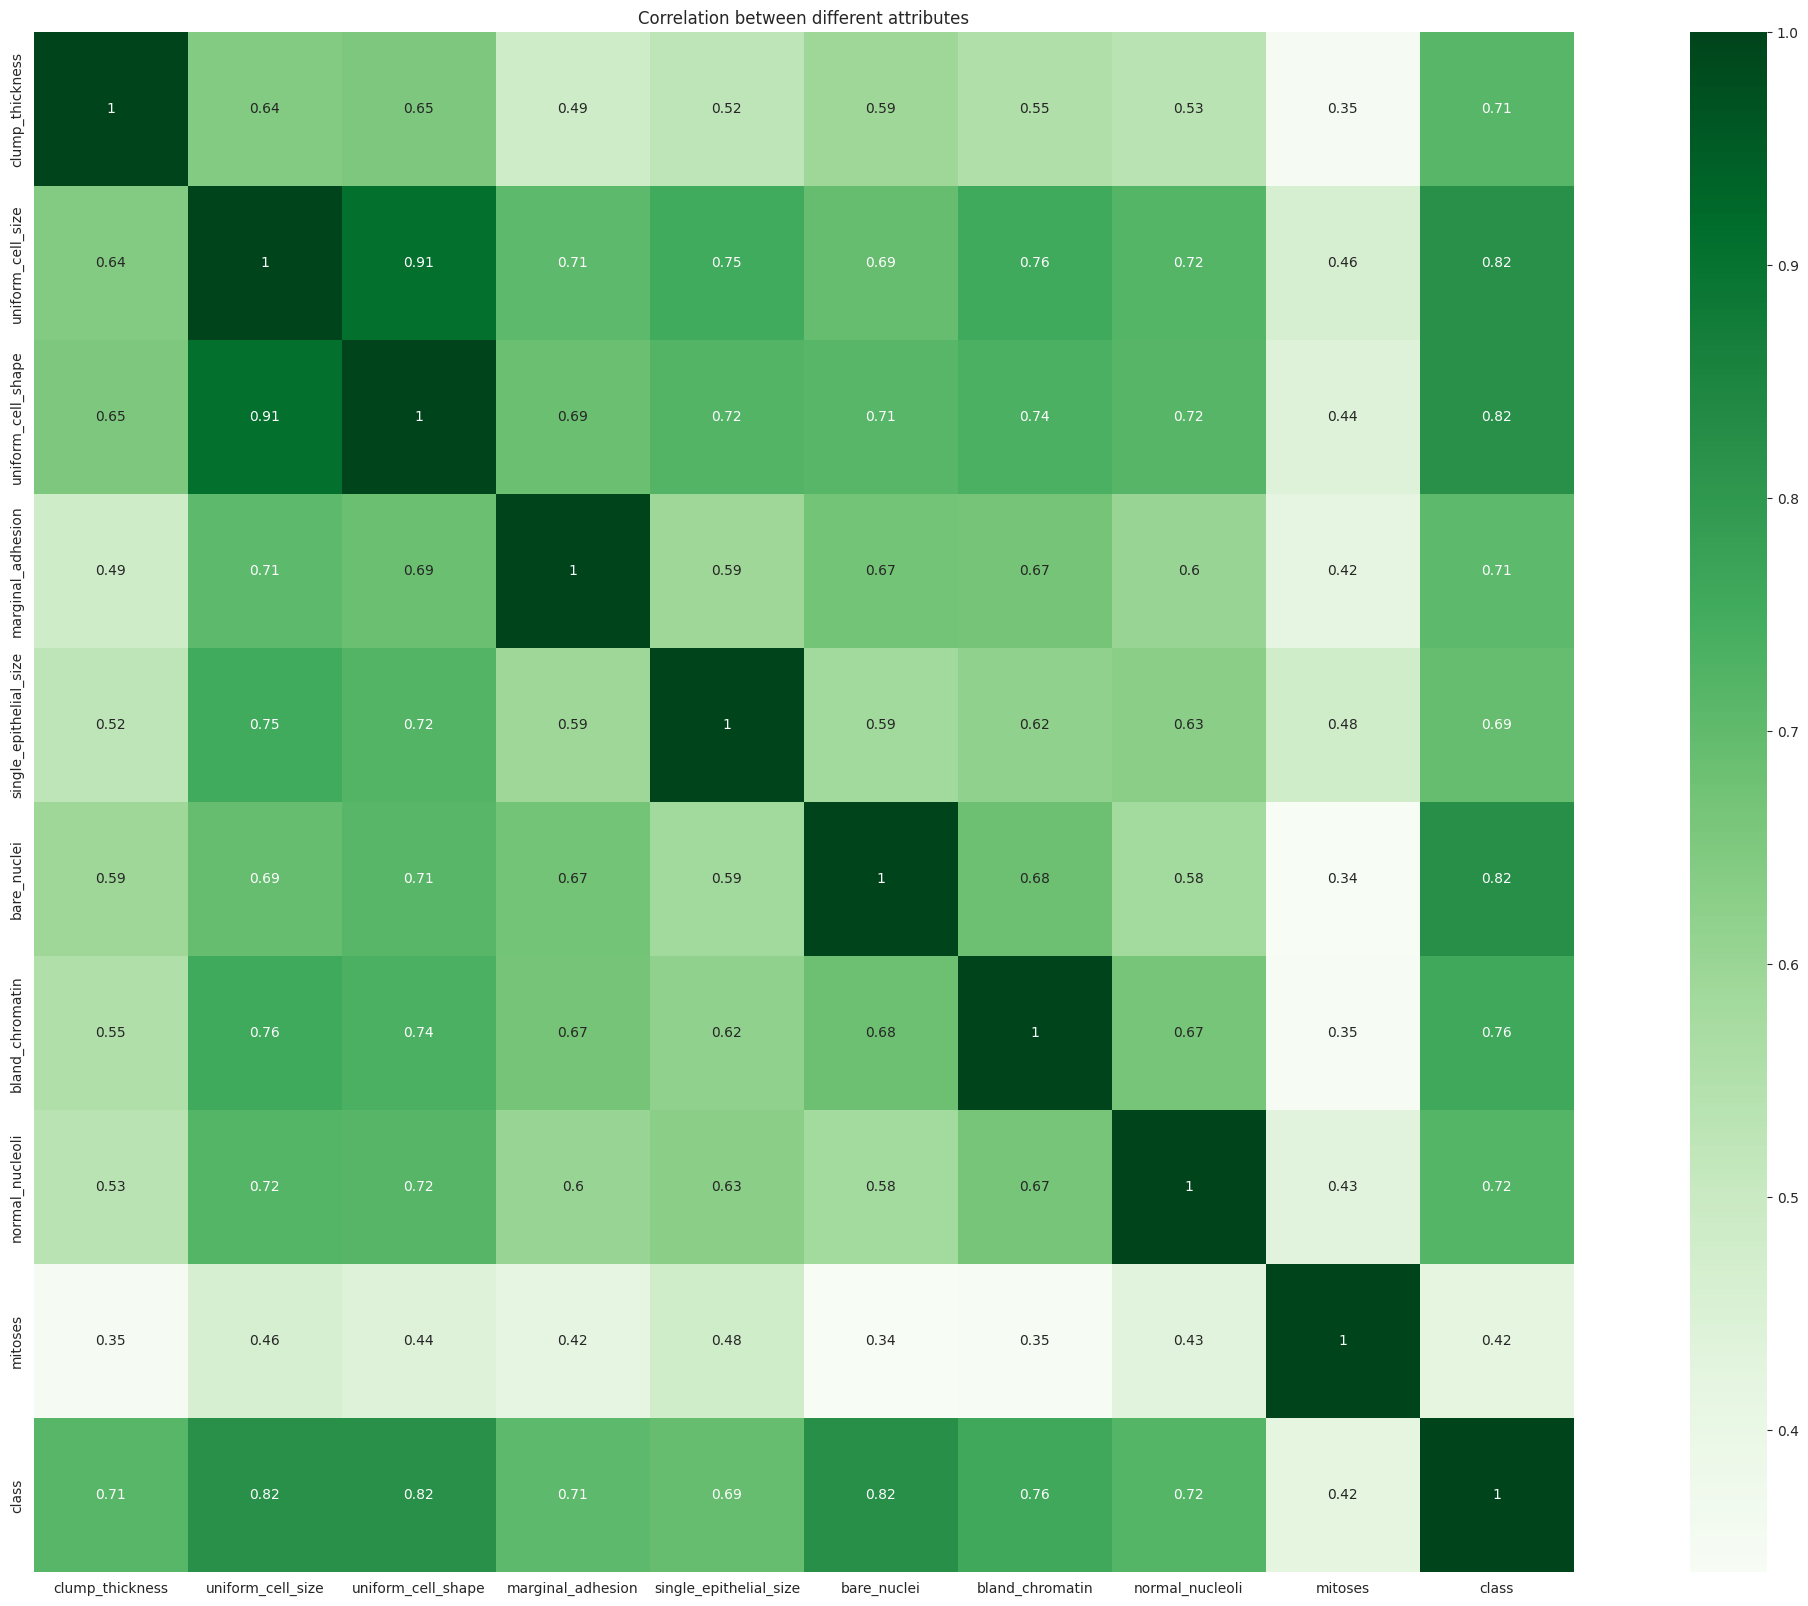

In [ ]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Greens)
plt.title('Correlation between different attributes')
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

,class
uniform_cell_size,0.820801
uniform_cell_shape,0.821891
bare_nuclei,0.822696
class,1.000000


## Train and Test Model
*  This is a binary classification problem, and a few algorithms are appropriate for use.
*   We will use 10 fold cross validation for each model.

In [ ]:
Y = df['class'].values
X = df.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=21)

In [ ]:
# Define models to train
models= []
#models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LogReg', LogisticRegression(random_state=0)))
models.append(('DT', DecisionTreeClassifier(criterion='entropy',random_state=0)))
models.append(('RF', RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)))

# evaluate each model in turn on train set with 10 fold cross-validation
results = []
names = []

kfold = KFold(n_splits=10)

for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s \nMean accuracy = %f , Std accuracy = %f\n" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB 
Mean accuracy = 0.953989 , Std accuracy = 0.020471

KNN 
Mean accuracy = 0.966489 , Std accuracy = 0.016870

LogReg 
Mean accuracy = 0.956073 , Std accuracy = 0.019733

DT 
Mean accuracy = 0.943484 , Std accuracy = 0.018945

RF 
Mean accuracy = 0.951817 , Std accuracy = 0.018963



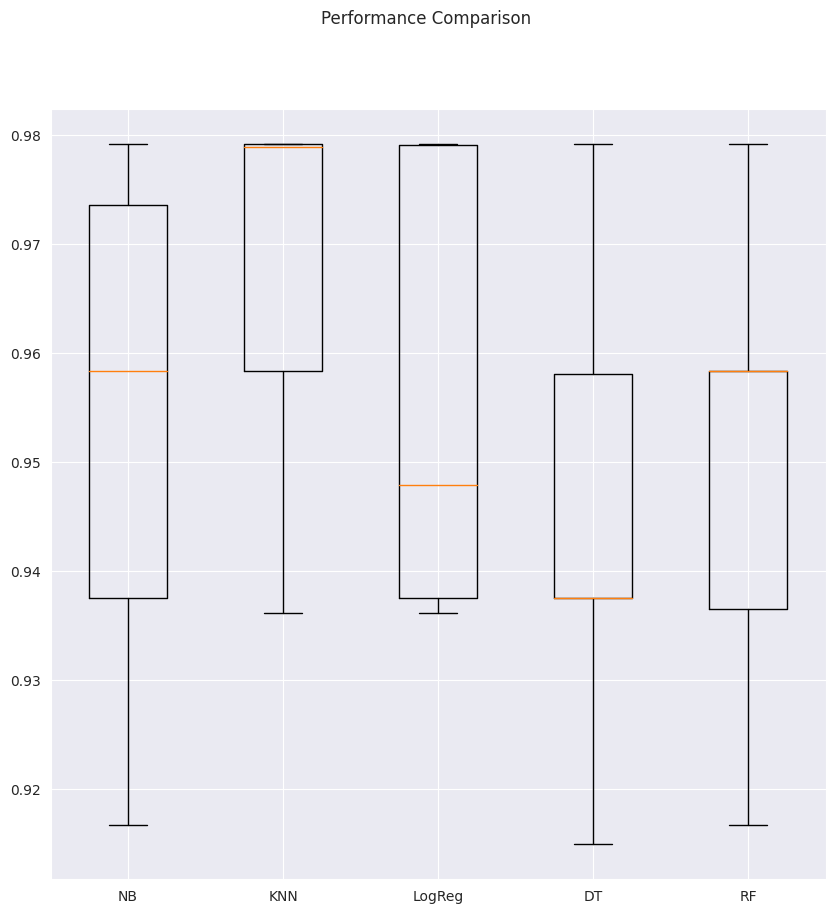

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


NB
Accuracy score: 0.9804878048780488
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98       131
           4       0.97      0.97      0.97        74

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



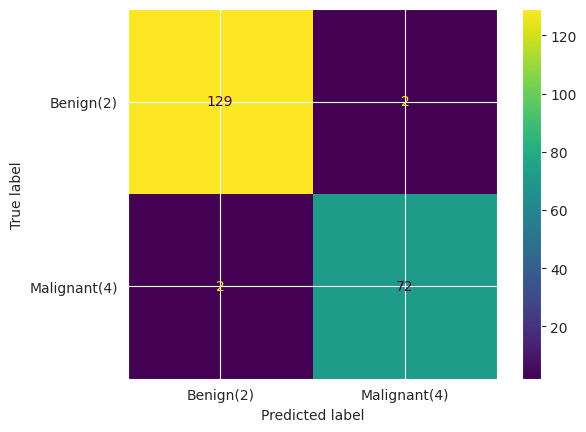


KNN
Accuracy score: 0.9804878048780488
Classification report:
               precision    recall  f1-score   support

           2       0.97      1.00      0.98       131
           4       1.00      0.95      0.97        74

    accuracy                           0.98       205
   macro avg       0.99      0.97      0.98       205
weighted avg       0.98      0.98      0.98       205



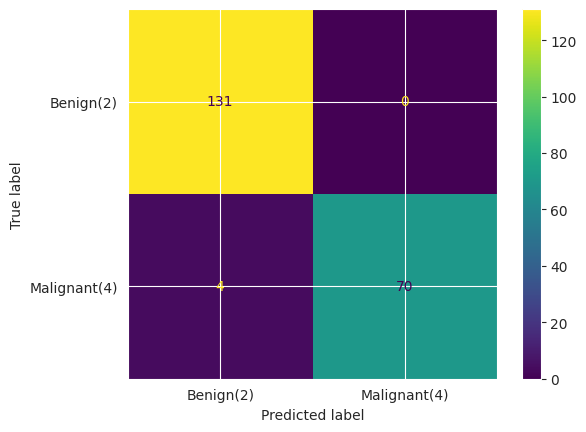


LogReg
Accuracy score: 0.9804878048780488
Classification report:
               precision    recall  f1-score   support

           2       0.97      1.00      0.98       131
           4       1.00      0.95      0.97        74

    accuracy                           0.98       205
   macro avg       0.99      0.97      0.98       205
weighted avg       0.98      0.98      0.98       205



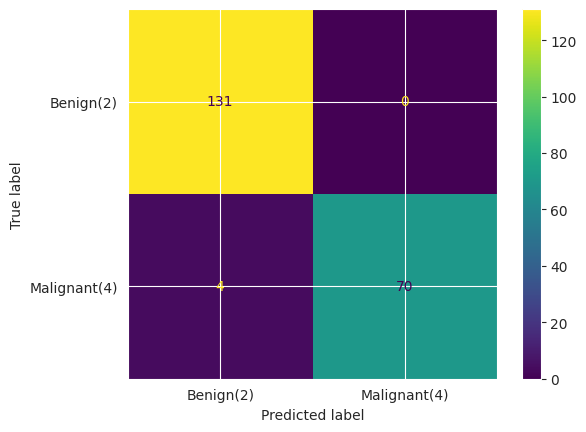


DT
Accuracy score: 0.9512195121951219
Classification report:
               precision    recall  f1-score   support

           2       0.93      1.00      0.96       131
           4       1.00      0.86      0.93        74

    accuracy                           0.95       205
   macro avg       0.96      0.93      0.95       205
weighted avg       0.95      0.95      0.95       205



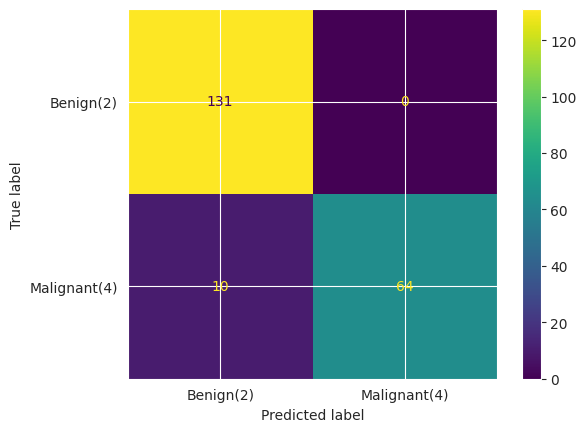


RF
Accuracy score: 0.9658536585365853
Classification report:
               precision    recall  f1-score   support

           2       0.95      1.00      0.97       131
           4       1.00      0.91      0.95        74

    accuracy                           0.97       205
   macro avg       0.97      0.95      0.96       205
weighted avg       0.97      0.97      0.97       205



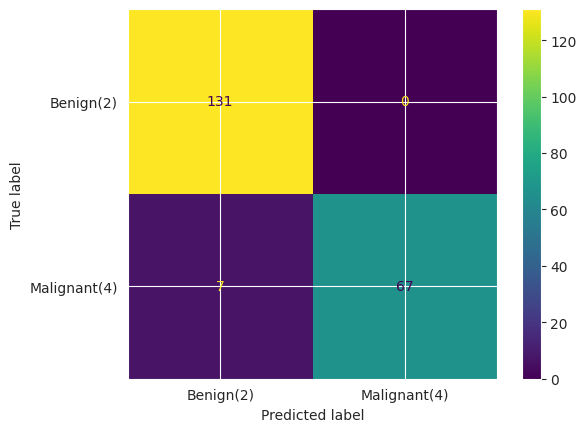

In [ ]:
# Make predictions on test set

for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print("\n%s" %name)
    print("Accuracy score:" , accuracy_score(Y_test, predictions))
    print("Classification report:\n",classification_report(Y_test, predictions))
    cm = confusion_matrix(Y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['Benign(2)','Malignant(4)'])
    disp.plot()
    plt.show()